In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

scene_path = './data/input1.jpg'
mask_path = './data/input1_mask.jpg'
compl_path = './data/result_img007.jpg'

(600, 800)
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]


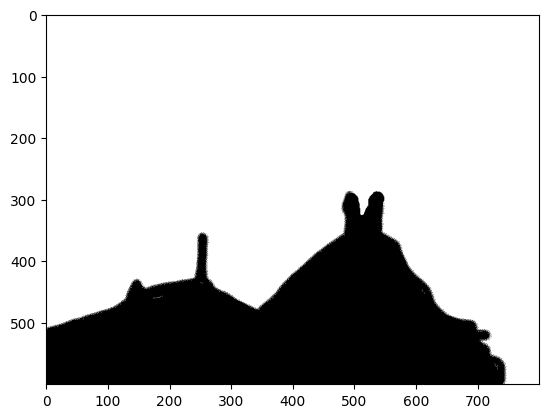

In [22]:
mask_im = np.asarray(Image.open(mask_path).convert('1'))
plt.imshow(mask_im, cmap='gray')
print(mask_im.shape)
print(mask_im[:5, :5])

In [45]:
from main import vicinity_via_bfs

vicinity_via_bfs(Image.open(mask_path), 80)

test


In [15]:
tmp = (mask_im == [[[255, 255, 255]]])
tmp.shape

(600, 800, 3)

In [32]:
xs, ys = np.where(np.array([[True, False, True], [True, False, False]]) == True)
q = np.concatenate((xs.reshape(-1, 1), ys.reshape(-1, 1)), axis=1).tolist()
print(q)
print(type(q))

[[0, 0], [0, 2], [1, 0]]
<class 'list'>


In [35]:
q.pop()

[1, 0]

In [36]:
q

[[0, 2]]

In [37]:
list(zip([0, 1, 2], [2, 1, 0]))

[(0, 2), (1, 1), (2, 0)]

In [43]:
np.where(np.array([True, False, True]) == False)

(array([1]),)

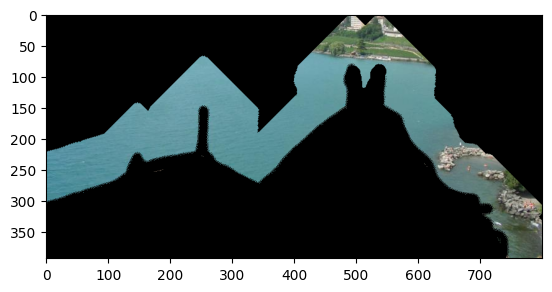

In [79]:
import main
import importlib
importlib.reload(main)

vici_np = main.vicinity_via_bfs(Image.open(mask_path), 80)
crop_np = main.crop(Image.open(scene_path), vici_np)
plt.imshow(crop_np)

Resampling.NEAREST


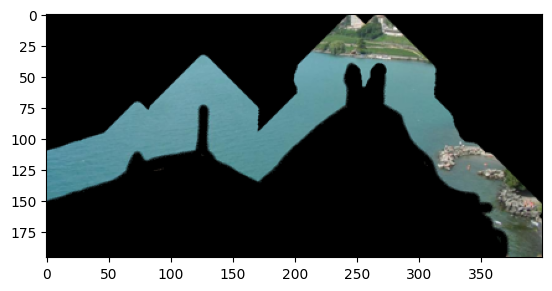

In [114]:
import PIL
print(Image.Resampling.NEAREST)
plt.imshow(Image.fromarray(np.uint8(crop_np)).resize((int(crop_np.shape[1] / 2), int(crop_np.shape[0] / 2))))

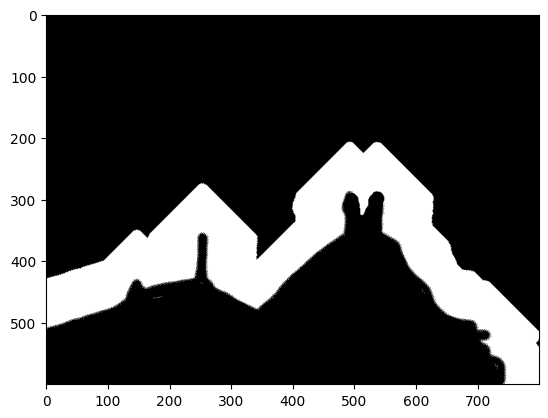

In [113]:
import matplotlib.pyplot as plt

plt.imshow(vici, cmap='gray')

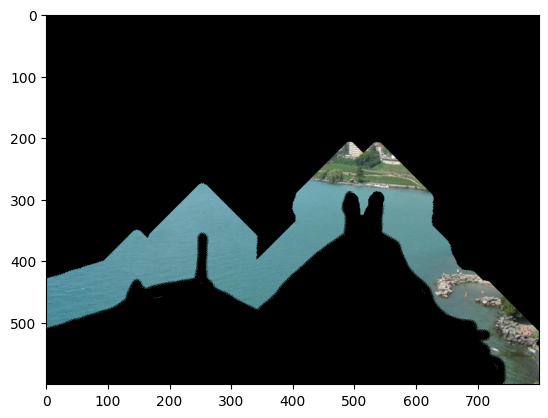

In [77]:
vici_np = np.expand_dims(vici, axis=2)
scene_np = np.asarray(Image.open(scene_path))
crop_np = vici_np * scene_np
plt.imshow(crop_np)

In [6]:
import jittor as jt

a = jt.arange(0, 10)
x = a.reindex([20], ['i0 / 2'])
print(x)

jt.Var([0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9], dtype=int32)


In [1]:
import main
import importlib
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
importlib.reload(main)

scene_path = './data/input1.jpg'
mask_path = './data/input1_mask.jpg'
comp_path = './data/input1/result_img007.jpg'

vici_np = main.vicinity_via_bfs(Image.open(mask_path), 80)
crop_np = main.crop(Image.open(scene_path), vici_np)

[i 1226 14:20:10.725358 28 log.cc:351] Load log_sync: 1
[i 1226 14:20:10.868552 28 compiler.py:955] Jittor(1.3.6.5) src: /usr/local/miniconda3/envs/scene/lib/python3.7/site-packages/jittor
[i 1226 14:20:10.878775 28 compiler.py:956] g++ at /usr/bin/g++(9.3.0)
[i 1226 14:20:10.880447 28 compiler.py:957] cache_path: /root/.cache/jittor/jt1.3.6/g++9.3.0/py3.7.15/Linux-5.4.0-13x06/IntelRXeonRCPUx6e/default
[i 1226 14:20:10.890895 28 __init__.py:411] Found nvcc(11.3.109) at /usr/local/cuda/bin/nvcc.
[i 1226 14:20:10.901743 28 __init__.py:411] Found addr2line(2.34) at /usr/bin/addr2line.
[i 1226 14:20:11.073626 28 compiler.py:1010] cuda key:cu11.3.109_sm_86
[i 1226 14:20:11.469035 28 __init__.py:227] Total mem: 62.65GB, using 16 procs for compiling.
[i 1226 14:20:11.693140 28 jit_compiler.cc:28] Load cc_path: /usr/bin/g++
[i 1226 14:20:11.849842 28 init.cc:62] Found cuda archs: [86,]
[i 1226 14:20:11.882484 28 compile_extern.py:519] mpicc not found, distribution disabled.


In [9]:
importlib.reload(main)

error_np = main.conv(crop_np, 1.0, Image.open(comp_path))
print(error_np.shape, error_np.min(), error_np.max())

(376, 225) 12830131000.0 19906060000.0


In [11]:
importlib.reload(main)

x, y, err = main.conv(crop_np, 1.0, Image.open(comp_path))
print(x, y, err)

319 0 12830131000.0


In [ ]:
import matplotlib.pyplot as plt

comp_np = np.asarray(Image.open(comp_path))
h, w = crop_np.shape[:2]
plt.imshow(comp_np[x:x+h, y:y+w])

In [9]:
print(conv_np.max(), conv_np.min())

19913210000.0 12837479000.0


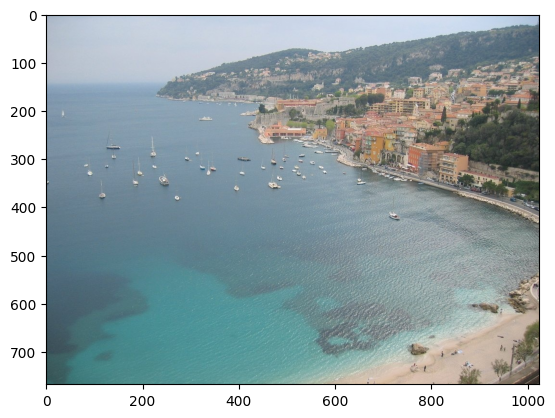

In [16]:
comp_np = np.asarray(Image.open(comp_path))
plt.imshow(comp_np)

In [97]:
%%time

import jittor as jt
import importlib
import numpy as np
import main
import matplotlib.pyplot as plt
from PIL import Image
import flow
import blend
importlib.reload(flow)
importlib.reload(main)
importlib.reload(blend)

if jt.has_cuda:
    jt.flags.use_cuda = 1
print(jt.compiler.has_cuda)
print(jt.flags.use_cuda)

scene_path = './data/input2.jpg'
mask_path = './data/input2_mask.jpg'
comp_path = './data/input2/result_img002.jpg'

scene_im = Image.open(scene_path)
scene_np = np.asarray(scene_im)
mask_im = Image.open(mask_path)
vici_np, dis_np = main.vicinity_via_bfs(Image.open(mask_path), 80)
crop_np, vici_np, dis_np, x_min, x_max, y_min, y_max = main.crop(Image.open(scene_path), vici_np, dis_np, mask_im)
comp_np = main.select_comp(0.9, 1.2, Image.open(comp_path), crop_np, vici_np)
patch_mask_np = flow.select_patch_mask(dis_np, comp_np, crop_np)
global_mask_np = np.zeros(scene_np.shape[:2], dtype=np.int32)
global_mask_np[x_min:x_max + 1, y_min:y_max + 1] = 1 - patch_mask_np
global_patch_np = np.zeros(scene_np.shape, dtype=np.int32)
global_patch_np[x_min:x_max + 1, y_min:y_max + 1] = comp_np

1
1
1
1
CPU times: user 9.64 s, sys: 11.9 ms, total: 9.65 s
Wall time: 9.62 s


In [81]:
mask = np.asarray(Image.open(mask_path).convert('1'))
print(x_min, x_max, y_min, y_max)

77 293 0 799


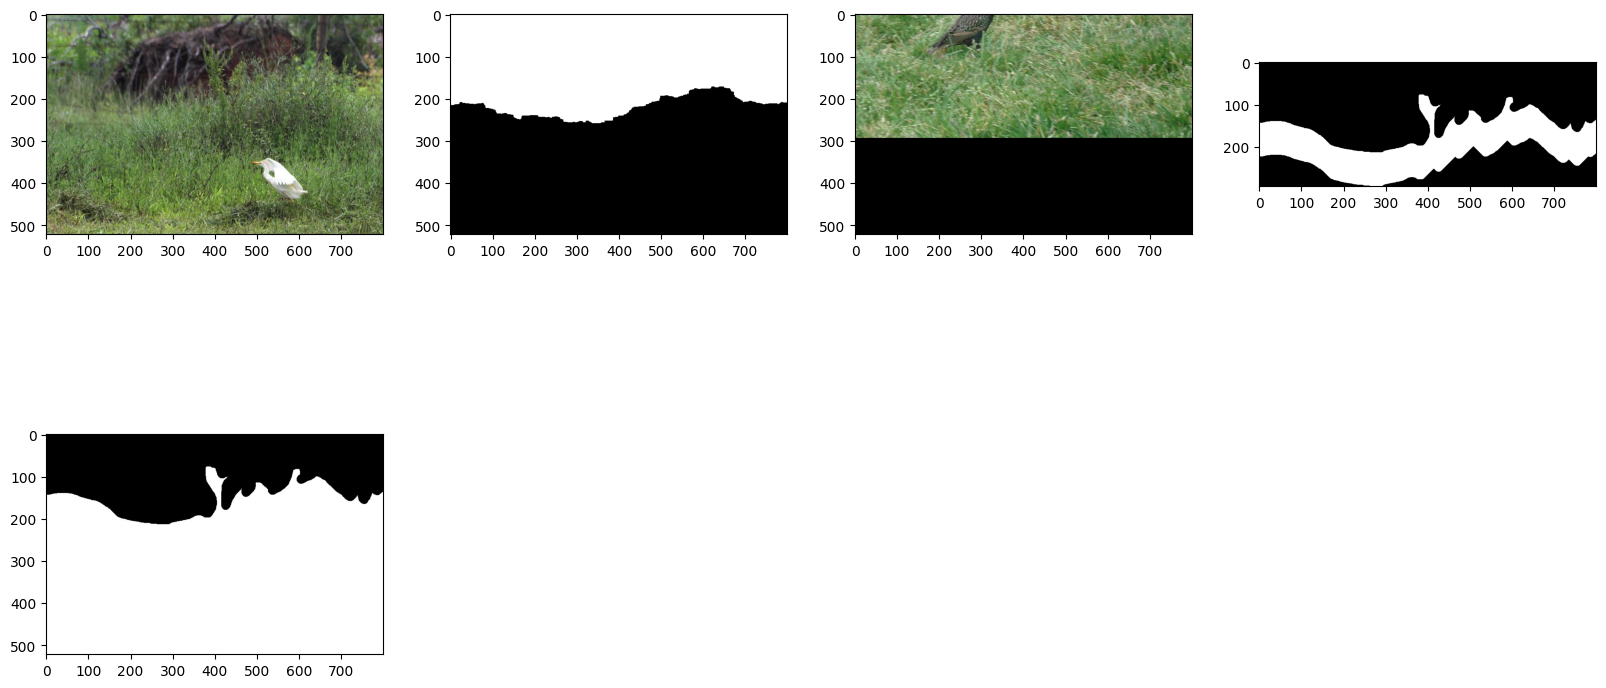

In [91]:
plt.subplots(figsize=(20, 10))
plt.subplot(2, 4, 1)
plt.imshow(scene_np)
plt.subplot(2, 4, 2)
plt.imshow(global_mask_np, cmap='gray')
plt.subplot(2, 4, 3)
plt.imshow(global_patch_np)
plt.subplot(2, 4, 4)
plt.imshow(vici_np, cmap='gray')
plt.subplot(2, 4, 5)
plt.imshow(Image.open(mask_path))

In [92]:
%%time

import blend
importlib.reload(blend)

output = blend.blend(scene_np, global_mask_np, global_patch_np)

175881it [00:32, 5394.24it/s]


CPU times: user 1min 23s, sys: 1.9 s, total: 1min 25s
Wall time: 1min 24s


(522, 800, 3) 229 0


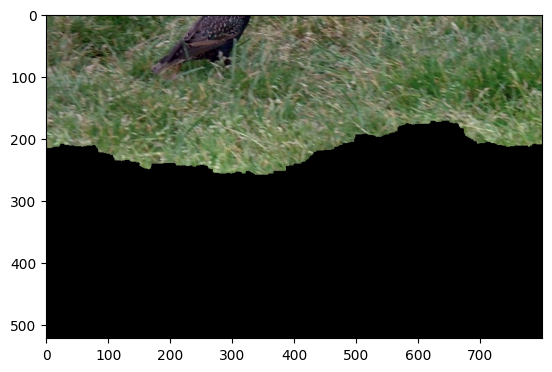

In [93]:
output = np.uint8(np.clip(output, 0, 255))
print(output.shape, output.max(), output.min())
plt.imshow(output)

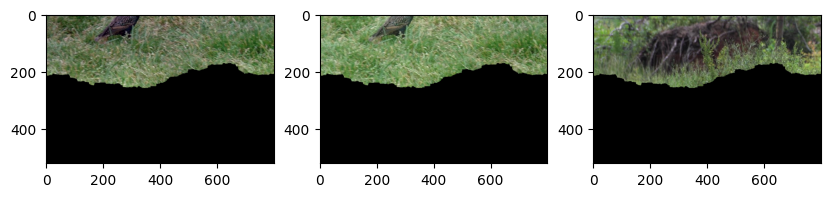

In [94]:
plt.subplots(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(output)
plt.subplot(1, 3, 2)
plt.imshow(global_patch_np * np.expand_dims(global_mask_np, axis=2))
plt.subplot(1, 3, 3)
plt.imshow(scene_np * np.expand_dims(global_mask_np, axis=2))

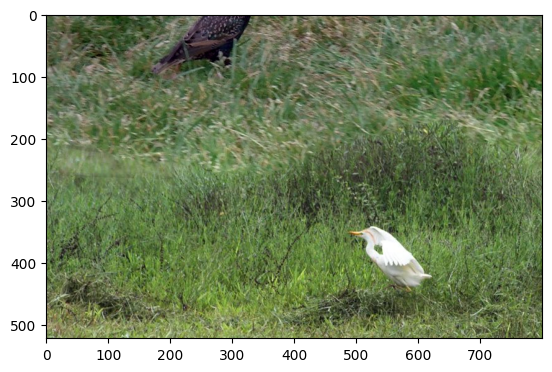

In [95]:
mask = np.expand_dims(global_mask_np, axis=2)
plt.imshow(scene_np * (1 - mask) + output * mask)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


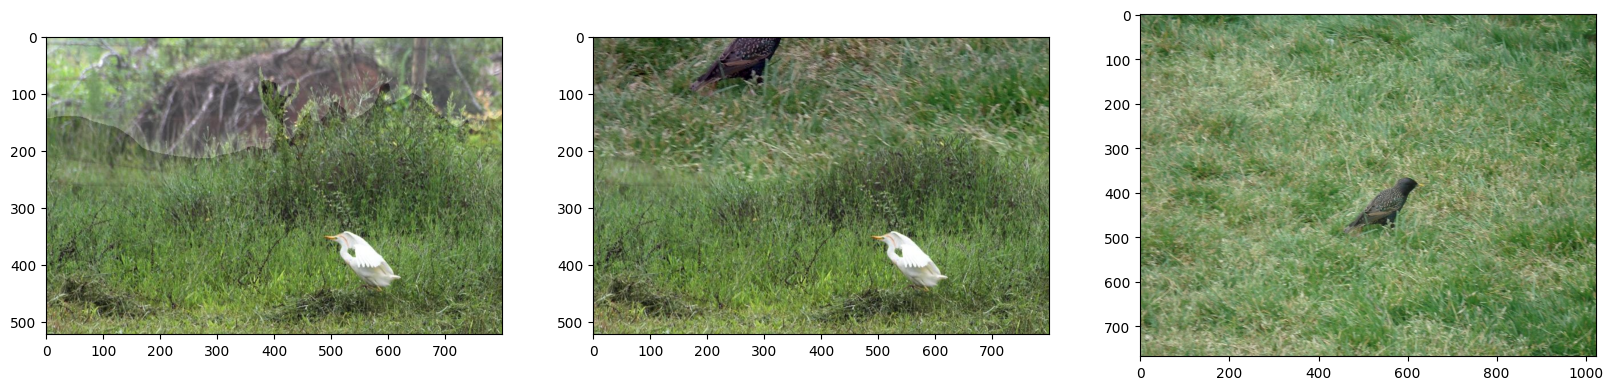

In [96]:
plt.subplots(figsize=(20, 20))
plt.subplot(1, 3, 2)
plt.imshow(scene_np * (1 - mask) + output * mask)
plt.subplot(1, 3, 1)
mask_np = np.asarray(Image.open(mask_path).convert('1'))
mask_np = np.expand_dims(mask_np, axis=2)
plt.imshow(scene_np + (1 - mask_np) * 50)
plt.subplot(1, 3, 3)
plt.imshow(Image.open(comp_path))

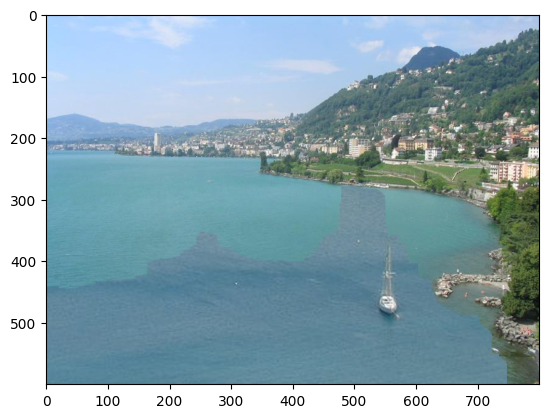

In [31]:
plt.imshow(scene_np * (1 - mask) + global_patch_np * mask)

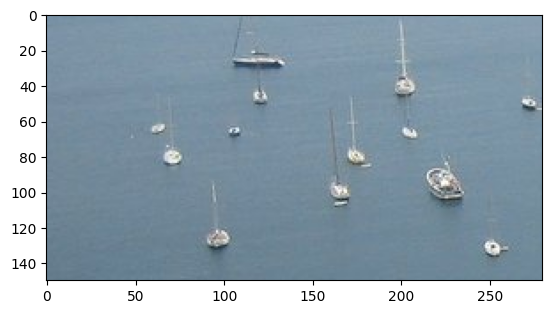

In [48]:
img = Image.open('./data/input5.jpg')
img = np.asarray(img)
plt.imshow(img[250:400, 20:300])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


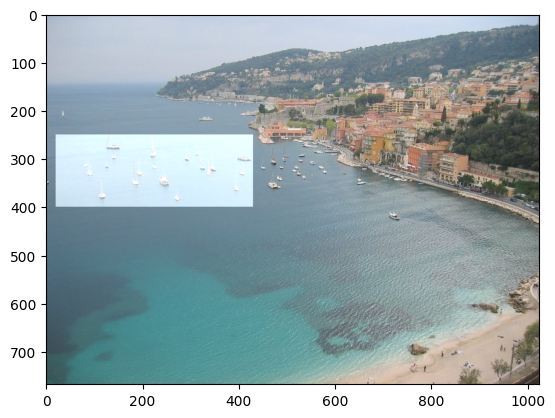

In [56]:
mask = np.zeros(img.shape[:2], dtype=np.int32)
mask[250:400, 20:430] = 1
plt.imshow(img + 100 * np.expand_dims(mask, axis=2))

In [66]:
mask = np.zeros(img.shape[:2], dtype=np.int32)
mask[250:400, 20:430] = 1
mask = np.expand_dims(mask, axis=2) * 255
mask = mask.repeat(3, axis=2)
mask = np.uint8(mask)
mask_im = Image.fromarray(255 - mask)
mask_im.save('./mask.jpg')